<a href="https://colab.research.google.com/github/tderr24/MAT-422/blob/main/HW_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422

## HW 2.3 - Independent Variables and Random Samples

### Thomas Derr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Joint Probability Distributions

A joint probability distribution shows the probbability distribution of two or more random variables


For two random variables $X$ and $Y$, the joint probability mass function is defined as

$p(x,y) = P(X=x \text{ and } Y=y)$


If $X$ and $Y$ are continuous, their marginal probability density function is

$P[(X,Y) \in A]=$ The volume under the density surface above $A$

Random variables are simmilar to random events, two variables $X$ and $Y$ are independent if for all $(x,y)$

$p(x,y) = p_X(x)\cdot p_Y(y)$ for discrete variables

and

$f(x,y) = f_X(x)\cdot f_Y(y)$ for continuous variables


In [ ]:
# essentailly here, we are simulating a lifetime of X and Y
# given their respective parameters, we generate a random number
# if the is less than 1400, it has "survived"
# if we do this many times, we should be able to approximate the
# probability that both component lives are atleast 1400 hours
# In the textbook it is calculated to be approx 0.0952

lambda_1 = 1 / 1100
lambda_2 = 1 / 1300
n =100000 # 1000 runs
survive_count = 0 # iterate when both last long


for i in range(0, n):
    X = np.random.exponential(scale= 1 /lambda_1, size=1)
    Y= np.random.exponential(scale= 1 / lambda_2, size=1)

    if ((X[0] > 1400) and (Y[0] > 1400)):
        survive_count += 1

pct = survive_count / n
pct

0.09626

## Correlation and Dependence

A correlation means that there is a predictive relationship between two variables, wheras covariance is the measure of the joint variability of two variables. It is commmon when dealing with dependent random variables to try and discern what relationship exists between them.

Given two random variables $X$ and $Y$, their covariance is

$\text{Cov}(X,Y) = E [(X - \mu_X) (Y - \mu_Y)]$

We can also refer to this as the expected product of $X$ and $Y$'s deviations

We can define the correlation coefficient of $X$ and $Y$ to be their covariance divided by the product of their standard deviations

$\rho_{X,Y} - \frac{\text{Cov}(X,Y)}{\sigma_X \cdot \sigma_Y}$

$\rho = 0$ for all independent variables, but not all $\rho \neq 0$ for dependent variables. Additionally, we know $|\rho| \leq 1$

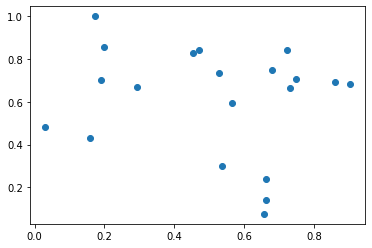

In [ ]:
X = np.random.rand(20)
Y = np.random.rand(20)
fig, ax = plt.subplots()
ax.scatter(X, Y)
a = np.corrcoef(X, Y)

In [ ]:
a[0,1] # As can be seen the correlation coefficinet for X and Y
# is very low, this is expected as can be seen in the graph
# they are also independently generated random distributions so
# they should be fairly independent of eachother

-0.15970807742524776

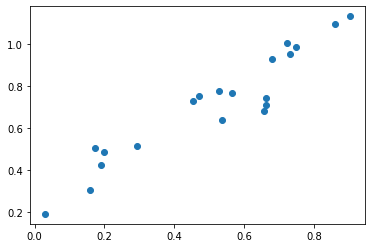

In [ ]:
Y_2 = X+ (np.divide([Y], 3))
fig, ax = plt.subplots()
ax.scatter(X, Y_2)
a_2 = np.corrcoef(X, Y_2)

In [ ]:
a_2[0,1] # our new variable Y_2 was made as a randomized alteration
# of X by a small ammount, so it is expected that the correlation
# coefficient would be close to 1. This is supported by the graph

0.9456277893586543

## Random Samples

A random sample is a randomly selected subset of a population

A set of random variables $S = X_1, X_2, ..., X_n$ form a simple random sample of size $n$ if

1. $\forall (X_i, X_j) \in S, X_i $ is indepenent of $X_j$
2. Every $X_i \in S$ has the same probability distribution

We can define the expected value and variance of $S$ to be

$E(\bar{X}) = \mu_\bar{X} - \mu$

$V(\bar{X}) = \sigma^2_\bar{X} = \frac{\sigma^2}{n}$

The central limit theorem states that the properly normalized sum of independent random variables approximates a normal distribution, regardless of whether or not the those variables are normally distributed, it states as follows

For a random sample $S = X_1, X_2, ..., X_n$ with sufficiently large $n$, mean $\mu$, and variance $\sigma^2$

$\bar{X}$ has approximatly a normal distribution with

$\mu_X = \mu$

$\sigma_\bar{X}^2 = \frac{\sigma^2}{n}$



(array([ 2.,  4.,  9., 16., 18., 22., 11.,  8.,  6.,  3.]),
 array([1006.33044034, 1023.83739674, 1041.34435314, 1058.85130954,
        1076.35826594, 1093.86522234, 1111.37217873, 1128.87913513,
        1146.38609153, 1163.89304793, 1181.40000433]),
 <BarContainer object of 10 artists>)

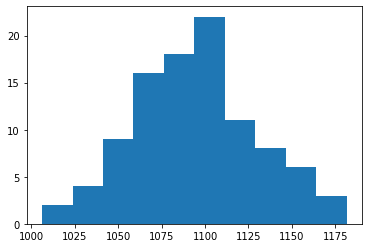

In [ ]:
# generate 100 exponential distributions of size 1000 and
#find the distribution of their means
df = pd.DataFrame()
size = 1000
n = 100

for i in range(1, n):
    rowname = "row " + str(i)
    X_n= np.random.exponential(scale= 1 /lambda_1, size=size)
    df[rowname] = X_n

means = df.mean()

plt.hist(means)# as can be seen, the means are normally distributed
# despite the original distribution being exponential